In order to successfully complete this assignment you must do the required reading, watch the provided videos and complete all instructions.  The embedded Google form must be entirely filled out and submitted on or before **11:59pm on Wednesday October 30**.  Students must come to class the next day prepared to discuss the material covered in this assignment. answer

# Pre-Class Assignment: Singular Value Decomposition

## Goals for today's pre-class assignment 

</p>

1. [Video On Singular Value Decomposition](#Video_On_Signular_Value_Decomposition)
1. [Assignment wrap-up](#Assignment_wrap-up)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing()

---
<a name="Video_On_Signular_Value_Decomposition"></a>

# 1. Video On Signular Value Decomposition

Calculating the eigenvaluse and eigenvectors of a matrix requires that the matrix is square ($n \times n$). Think of SVD as a way to get similar information from a non-square matrix.

This video is a little longer than most videos.  I recommend reading the questions first and then watching the video and following along with the provided code examples.

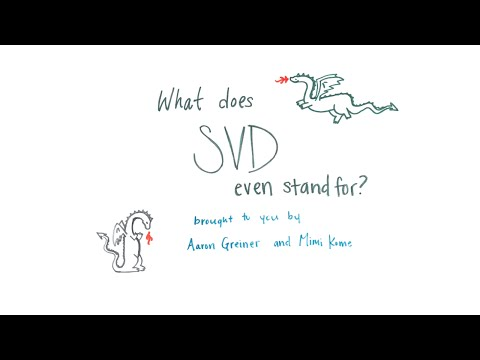

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("EfZsEFhHcNM",width=640,height=360)

### Diagonalize a Square Matrix

Consider the following matrix provided in the above video (~1:50 into the video)

In [3]:
A = np.matrix([[1,1,3], [-3, -5, -3], [3, 3, 1]])
sym.Matrix(A)

⎡1   1   3 ⎤
⎢          ⎥
⎢-3  -5  -3⎥
⎢          ⎥
⎣3   3   1 ⎦

&#9989; <font color=red>**DO THIS:**</font> Calculate the Eigenvalues and Eigenvectors for the above matrix $A$. name the eigenvalues (vals) and the eigenvectors (vecs)

In [4]:
##Put your code here
print(np.linalg.eig(A))
vals = np.linalg.eig(A)[0]
vecs = np.linalg.eig(A)[1]

(array([ 2.37228132, -3.37228132, -2.        ]), matrix([[-7.17666340e-01,  3.07751722e-01, -7.07106781e-01],
        [ 4.92420057e-01,  6.72788554e-01, -6.10622664e-16],
        [-4.92420057e-01, -6.72788554e-01,  7.07106781e-01]]))


The following code sorts the eigenvectors based on the ordering of the eigenvalues. It does this using the argsort algorithm which puts the values in ascending order.  The ```[::-1]``` notation reverses the order of the indexes.  We will put the sorted vectors into a matrix called $P$

In [5]:
idx = vals.argsort()[::-1]   
vals = vals[idx]
vecs = vecs[:,idx]

V = vecs
sym.Matrix(V)

P = vecs
sym.Matrix(P)

⎡-0.717666339515337   -0.707106781186547    0.307751722477118 ⎤
⎢                                                             ⎥
⎢0.492420057027868   -6.10622663543836e-16  0.672788554195286 ⎥
⎢                                                             ⎥
⎣-0.492420057027868    0.707106781186548    -0.672788554195286⎦

The following code generates a matrix of the same size as $A$ and puts the eigenvalues on the diagonals. 

In [6]:
D = np.zeros(A.shape)
for i in range(len(vals)):
    D[i,i] = vals[i]
sym.Matrix(D)

⎡2.37228132326901  0.0          0.0       ⎤
⎢                                         ⎥
⎢      0.0         -2.0         0.0       ⎥
⎢                                         ⎥
⎣      0.0         0.0   -3.37228132326901⎦

&#9989; <font color=red>**DO THIS:**</font> Show that $A=PDP^{-1}$

In [7]:
#Put your answer here
print(A)
P * D * np.linalg.inv(P)

[[ 1  1  3]
 [-3 -5 -3]
 [ 3  3  1]]


matrix([[ 1.,  1.,  3.],
        [-3., -5., -3.],
        [ 3.,  3.,  1.]])

&#9989; <font color=red>**DO THIS:**</font> Show that $A^{10}=PD^{10}P^{-1}$. I.e. multiply A by itself 10 times and then taking $\sigma^10$ for each of the eigenvalues in the diagonal of $D$.

In [8]:
# Put your answer to the above question here
print(A*A*A*A*A*A*A*A*A*A)
print(P*D*D*D*D*D*D*D*D*D*D*np.linalg.inv(P))

[[  49735  112969   48711]
 [  96387  242509   96387]
 [ -96387 -241485  -95363]]
[[  49735.  112969.   48711.]
 [  96387.  242509.   96387.]
 [ -96387. -241485.  -95363.]]


&#9989; <font color=red>**QUESTION 1:**</font> What is the estimated complexity of multiplying an arbitrary $n\times n$ matrix by itself $m$ times? (Hint: both $m$ and $n$ should be included in your Big-O notation answer). 

Put your answer to the above question here

$O(m*n^3)$

&#9989; <font color=red>**QUESTION 2:**</font> What is the estimated complexity (Big-O) of diagonalizing an $n \times n$ symmetric matrix? i.e. what is the complexity of decomposing $A$ into $PDP^{-1}$?

$O(n^3)$

&#9989; <font color=red>**QUESTION 3:**</font> What is the estimated complexity (Big-O) of multiplying a diagonlized $n \times n$ matrix by itself $m$ times? i.e. you already have $A=PDP^{-1}$ calculated what does it cost to calculate $A^m$?

O(n) to multiply itself

O(n * m)

O(n^3) + mO(n)

### Inverse of an orthonormal matrix $U$ is $U^T$
    
Caluclate the $P$ matrix for the following matrix $A$ such that $A=PDP^{-1}$

In [18]:
A = np.matrix([[6,-2,-1],[-2,6,-1], [-1,-1,5]])

print(np.linalg.eig(A))
vals = np.linalg.eig(A)[0]
vecs = np.linalg.eig(A)[1]
idx = vals.argsort()[::-1] 
vals = vals[idx]
vecs = vecs[:,idx]
D = np.zeros(A.shape)
for i in range(len(vals)):
    D[i,i] = vals[i]

P = vecs
# sym.Matrix(A)
print(A)
print(P)
print(P * D * np.linalg.inv(P))


(array([3., 8., 6.]), matrix([[ 5.77350269e-01,  7.07106781e-01, -4.08248290e-01],
        [ 5.77350269e-01, -7.07106781e-01, -4.08248290e-01],
        [ 5.77350269e-01, -2.78349284e-16,  8.16496581e-01]]))
[[ 6 -2 -1]
 [-2  6 -1]
 [-1 -1  5]]
[[ 7.07106781e-01 -4.08248290e-01  5.77350269e-01]
 [-7.07106781e-01 -4.08248290e-01  5.77350269e-01]
 [-2.78349284e-16  8.16496581e-01  5.77350269e-01]]
[[ 6. -2. -1.]
 [-2.  6. -1.]
 [-1. -1.  5.]]


&#9989; <font color=red>**DO THIS:**</font> Show that in this special case (Where $A$ is symmetric) $A=PDP^T$

In [19]:

print(P * D * P.T)

[[ 6. -2. -1.]
 [-2.  6. -1.]
 [-1. -1.  5.]]


&#9989; <font color=red>**QUESTION 4:**</font> What is the complexity of inverting an arbitrary $n \times n$ matrix?

O(n^3)

&#9989; <font color=red>**QUESTION 5:**</font> What is the complexity of inverting a $n \times n$ orthonormal matrix?

$$O(1)$$

### Non-square Matrix

Now consider the non-square $n \times m$ matrix $A$

In [3]:
A = np.matrix([[4, 11, 14], [8, 7, -2]])

sym.Matrix(A)

⎡4  11  14⎤
⎢         ⎥
⎣8  7   -2⎦

The following code calculate $A^TA=VDV^T$:

In [4]:
sym.Matrix(A.T*A)

⎡80   100  40 ⎤
⎢             ⎥
⎢100  170  140⎥
⎢             ⎥
⎣40   140  200⎦

In [5]:
eigvals, eigvec = np.linalg.eig(A.T*A)
print(A.T * A)
idx = eigvals.argsort()[::-1]   
eigvals = eigvals[idx]
eigvec = eigvec[:,idx]

V = eigvec

D = np.zeros(V.shape)
for i in range(len(eigvals)):
    D[i,i] = eigvals[i]
print(D)

print(V * D * V.T)
sym.Matrix(V)

[[ 80 100  40]
 [100 170 140]
 [ 40 140 200]]
[[ 3.60000000e+02  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  9.00000000e+01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -3.71123759e-15]]
[[ 80. 100.  40.]
 [100. 170. 140.]
 [ 40. 140. 200.]]


⎡-0.333333333333333  -0.666666666666666  -0.666666666666667⎤
⎢                                                          ⎥
⎢-0.666666666666667  -0.333333333333334  0.666666666666667 ⎥
⎢                                                          ⎥
⎣-0.666666666666667  0.666666666666667   -0.333333333333333⎦

&#9989; <font color=red>**DO THIS:**</font>  Calculate $AA^T=UDU^T$:

In [6]:
#Put your answer here
eigvals, eigvec = np.linalg.eig(A*A.T)
idx = eigvals.argsort()[::-1]   
eigvals = eigvals[idx]
eigvec = eigvec[:,idx]

U = eigvec
sym.Matrix(U)

⎡0.948683298050514  -0.316227766016838⎤
⎢                                     ⎥
⎣0.316227766016838  0.948683298050514 ⎦

The following code calculates $\Sigma$ by putting the singular values on the diagonal of an $n \times m$ zero matrix: the 

In [7]:

E = np.zeros(A.shape)

for i in range(len(eigvals)):
    E[i,i] = np.sqrt(eigvals[i])
    
sym.Matrix(E)

[[18.97366596  9.48683298]]


⎡18.9736659610103        0.0         0.0⎤
⎢                                       ⎥
⎣      0.0         9.48683298050514  0.0⎦

&#9989; <font color=red>**DO THIS:**</font>  Show that $A=U \Sigma V^T$

In [34]:
#Put your answer here
print(A)
print(U * E * V.T)

[[ 4 11 14]
 [ 8  7 -2]]
[[ -4. -11. -14.]
 [ -8.  -7.   2.]]


----

<a name="Assignment_wrap-up"></a>
# 2. Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

[Direct Link to Google Form](https://cmse.msu.edu/cmse314-pc-survey)


If you have trouble with the embedded form, please make sure you log on with your MSU google account at [googleapps.msu.edu](https://googleapps.msu.edu) and then click on the direct link above.

&#9989; <font color=red>**Assignment-Specific QUESTION:**</font> There is no Assignment specific question for this notebook. You can just say "none".

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font>  Summarize what you did in this assignment.

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font>  What questions do you have, if any, about any of the topics discussed in this assignment after working through the jupyter notebook?

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font>  How well do you feel this assignment helped you to achieve a better understanding of the above mentioned topic(s)?

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font> What was the **most** challenging part of this assignment for you? 

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font> What was the **least** challenging part of this assignment for you? 

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font>  What kind of additional questions or support, if any, do you feel you need to have a better understanding of the content in this assignment?

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font>  Do you have any further questions or comments about this material, or anything else that's going on in class?

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font> Approximately how long did this pre-class assignment take?

Put your answer to the above question here

In [17]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse314-pc-survey" 
	width="100%" 
	height="1000px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---------
### Congratulations, we're done!

To get credit for this assignment you must fill out and submit the above Google From on or before the assignment due date.

### Course Resources:

- [Syllabus](https://docs.google.com/document/d/e/2PACX-1vRAFflQFXulzSMwWcyr_SEd6piEzHLWTjGkwx49D6H6FZxQGWEHrKMDiIaV3Pu6adAQ-wjlg3IXptjM/pub)
- [Preliminary Schedule](https://docs.google.com/spreadsheets/d/e/2PACX-1vS5UoXTmHDnF99kTHOiHIWuOBG7iqts-8EsbpoJHayRTB7F8eI4SfMR0MVp7dt0RQrMkNTVW6M1x-wY/pubhtml)
- [Course D2L Page](https://d2l.msu.edu/d2l/home/832635)

&#169; Copyright 2019,  Michigan State University Board of Trustees